Enter number of n =20
vertices =  [[32, 10], [88, 89], [75, 2], [8, 25], [24, 73], [37, 74], [98, 74], [89, 2], [14, 65], [87, 27], [59, 38], [34, 2], [38, 75], [43, 57], [23, 83], [88, 67], [25, 26], [36, 35], [87, 41], [5, 61]]
Enter the value of k = 5



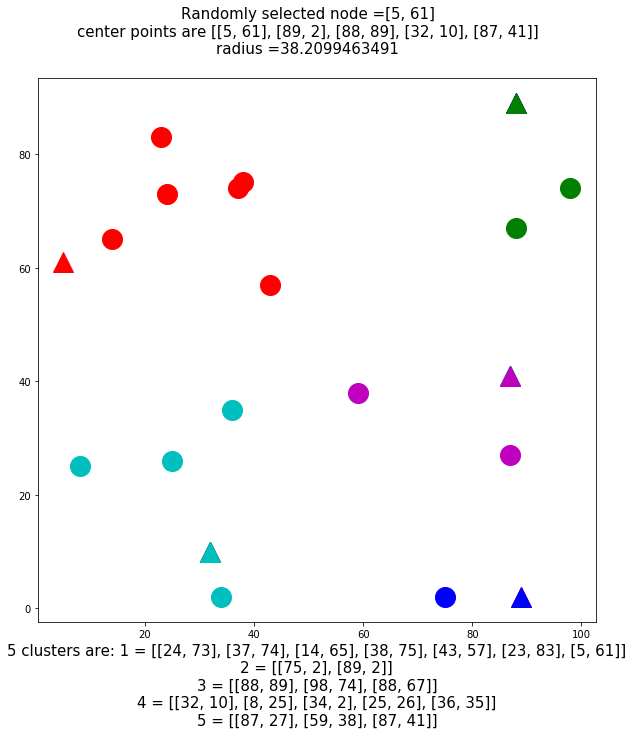

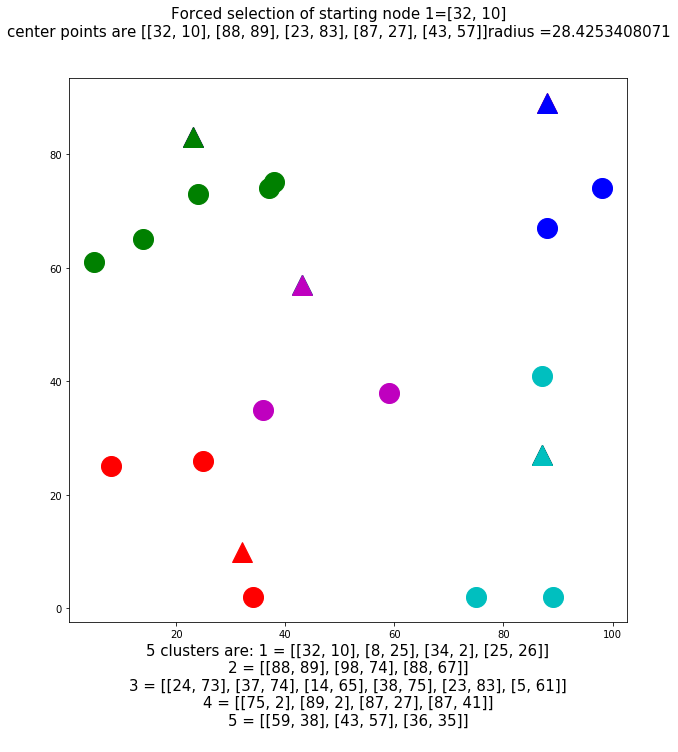

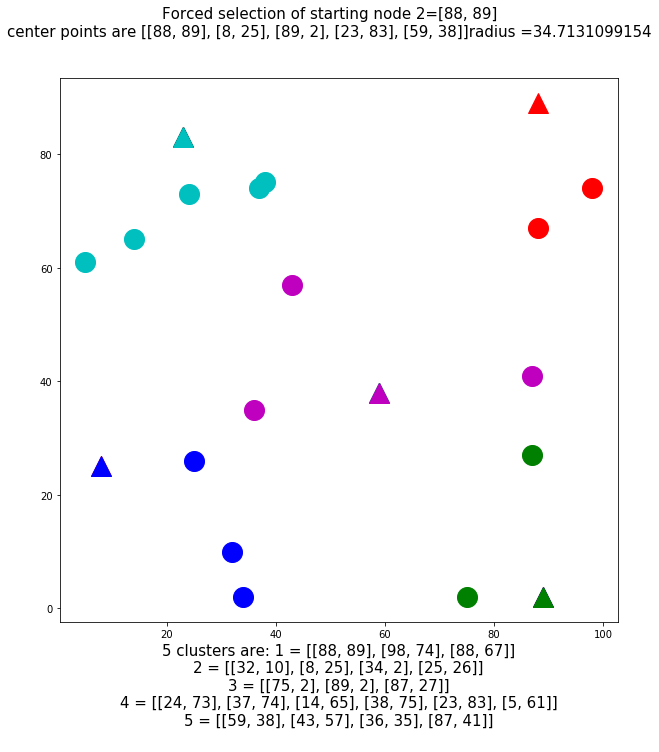

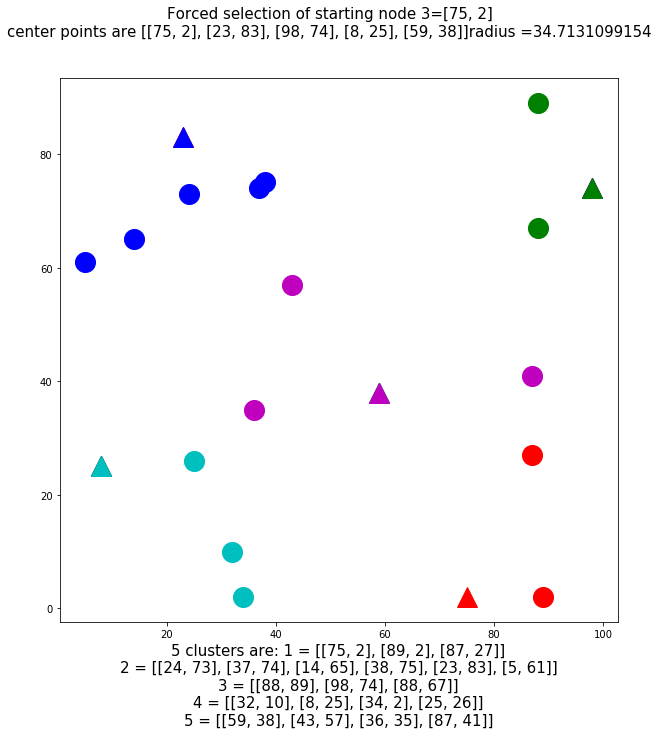

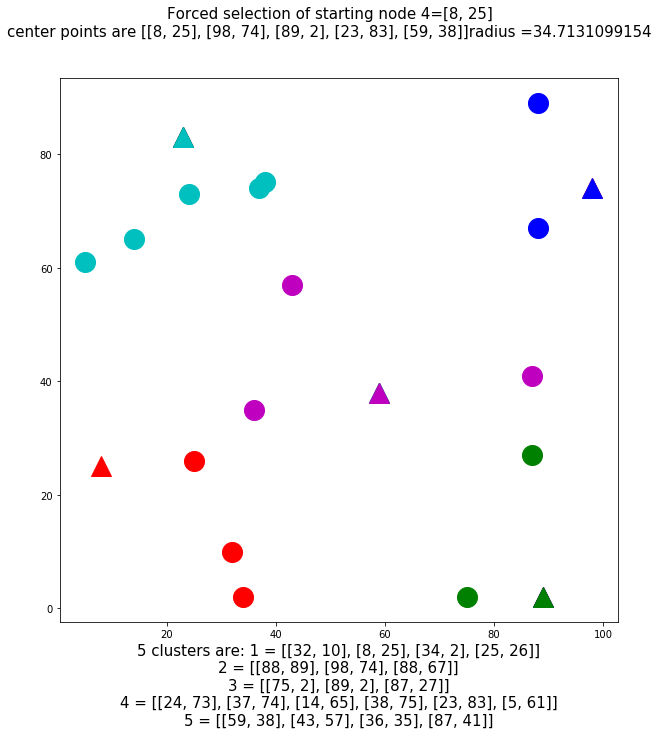

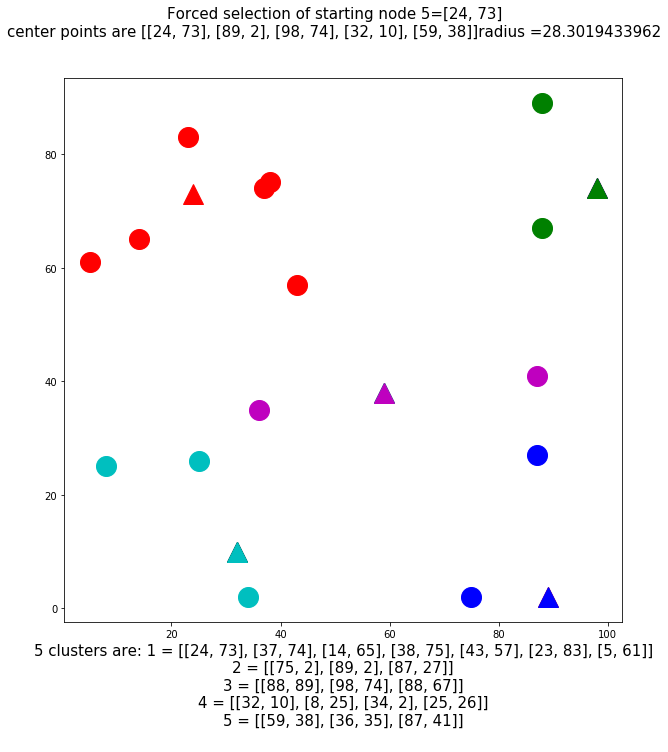

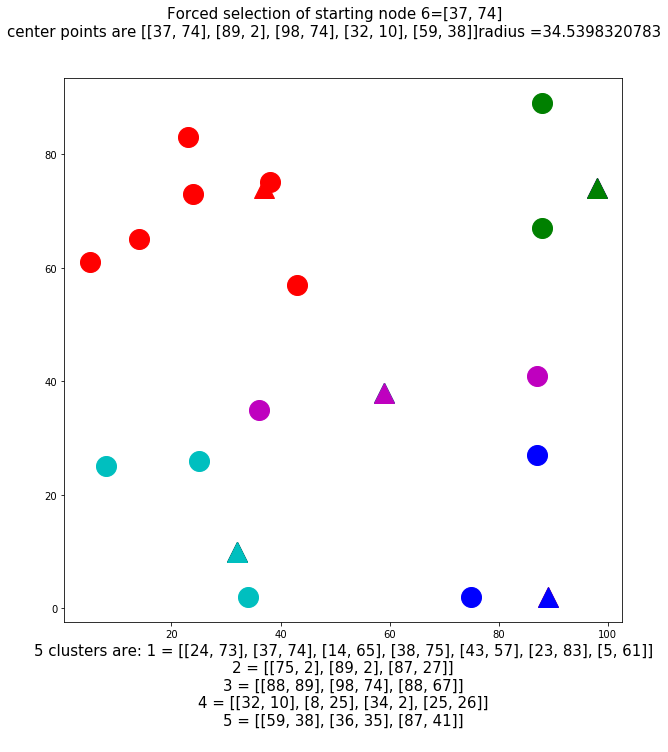

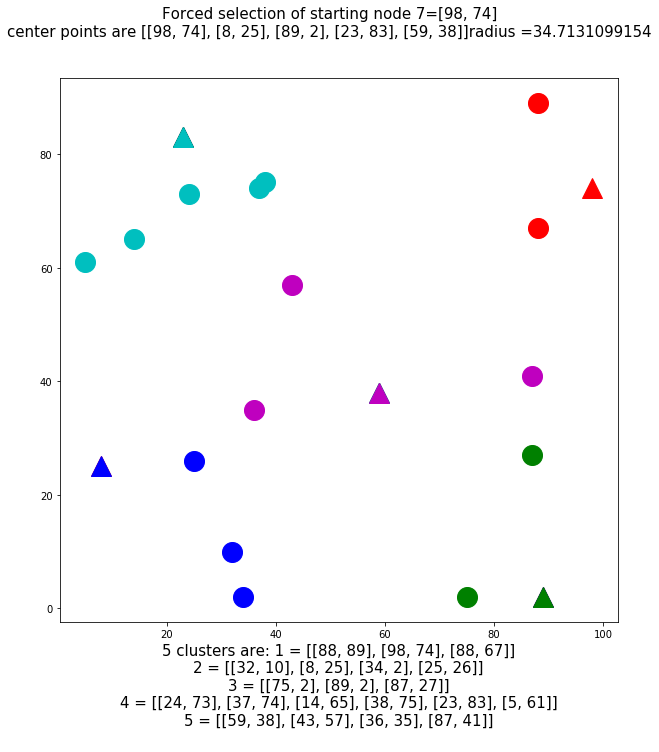

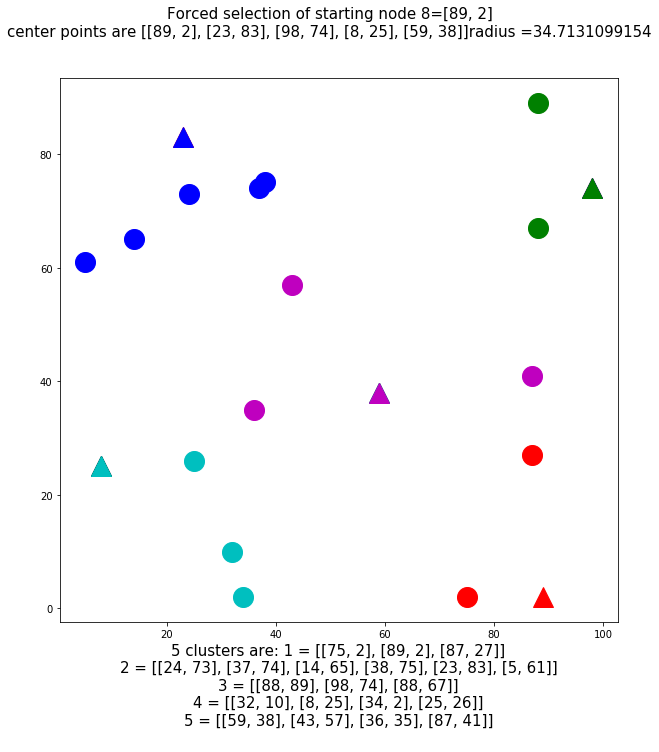

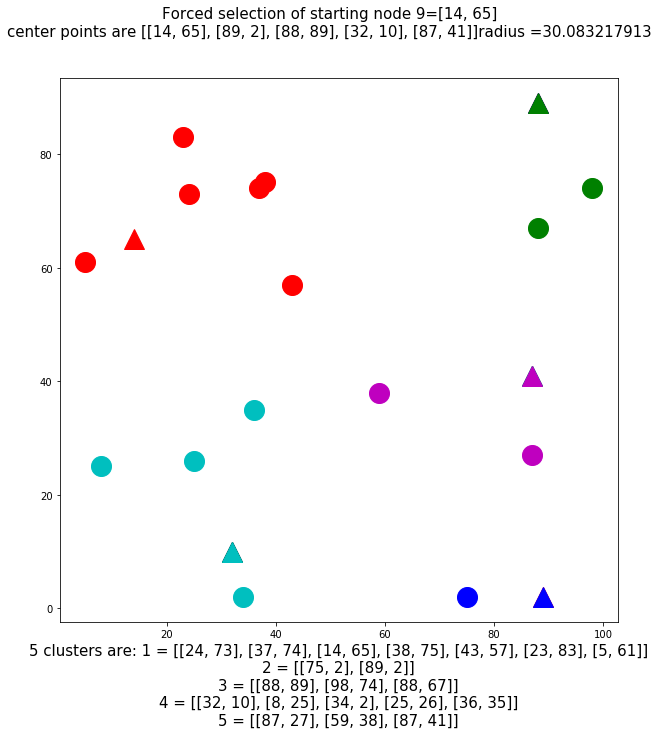

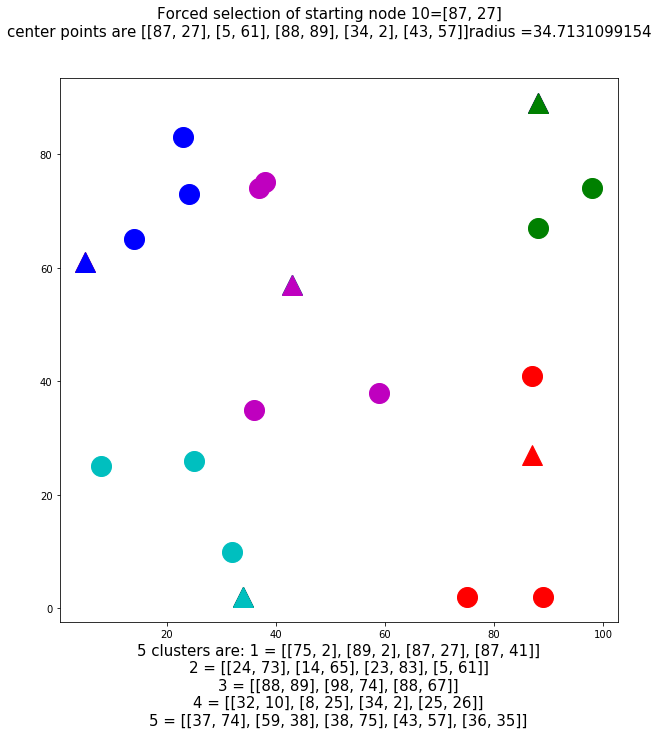

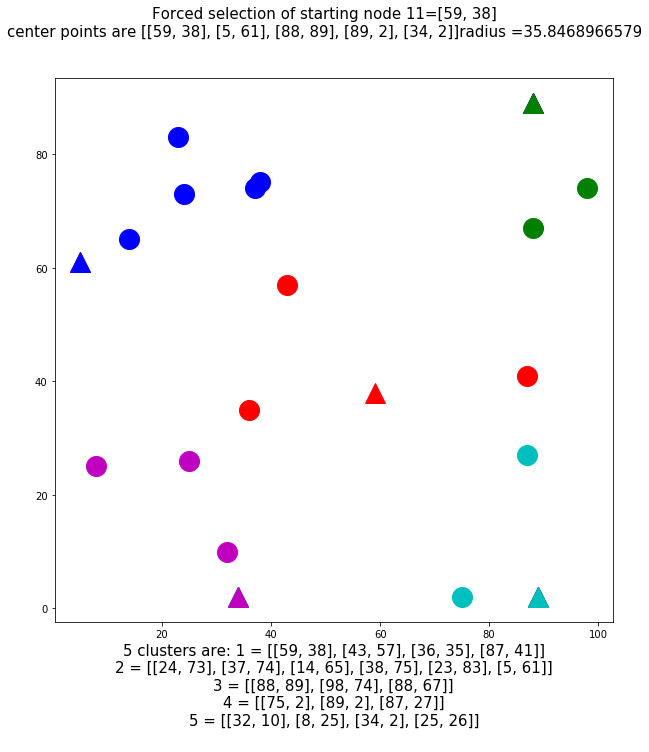

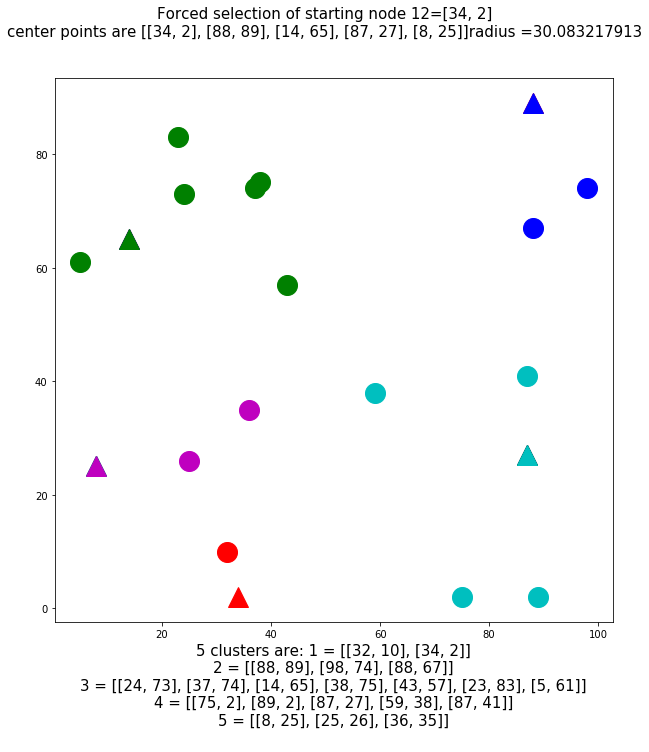

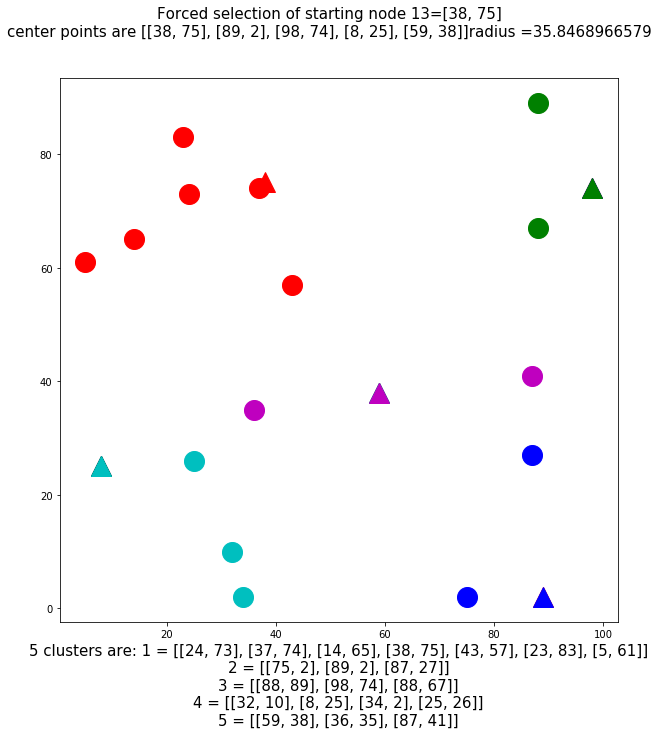

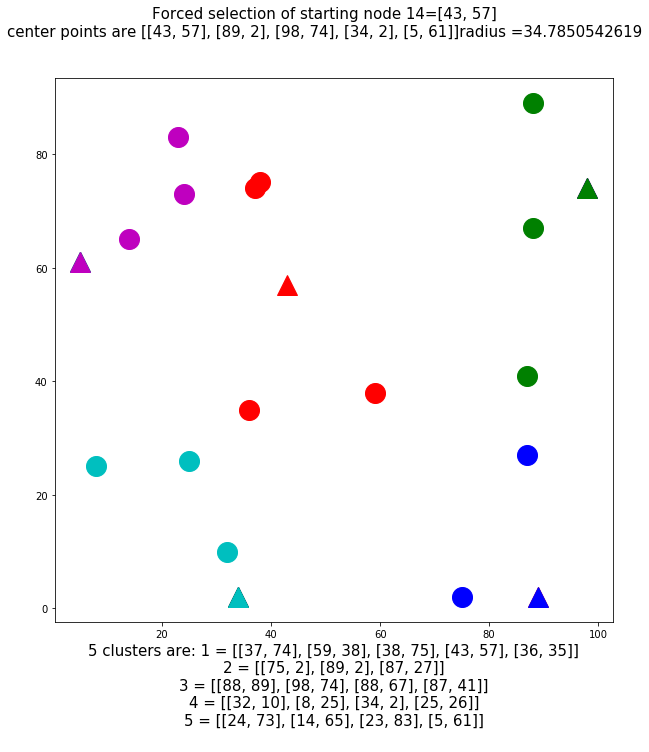

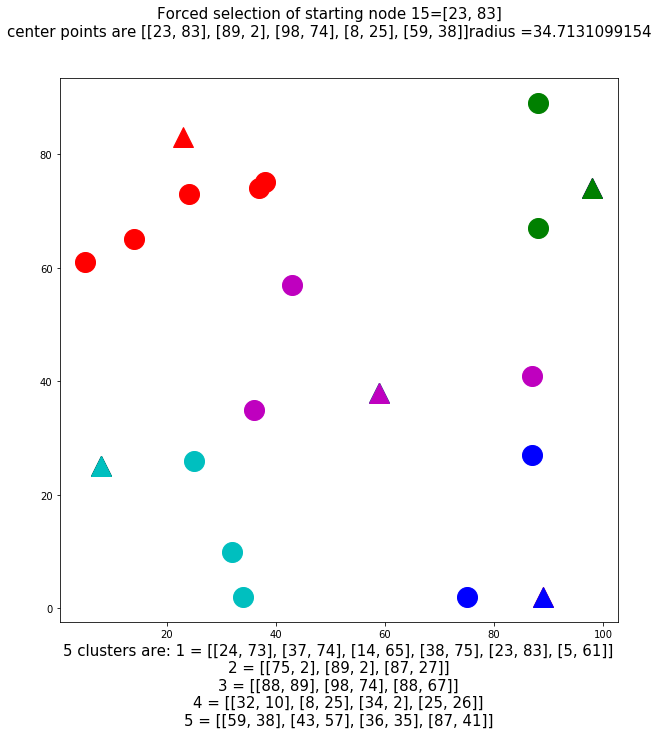

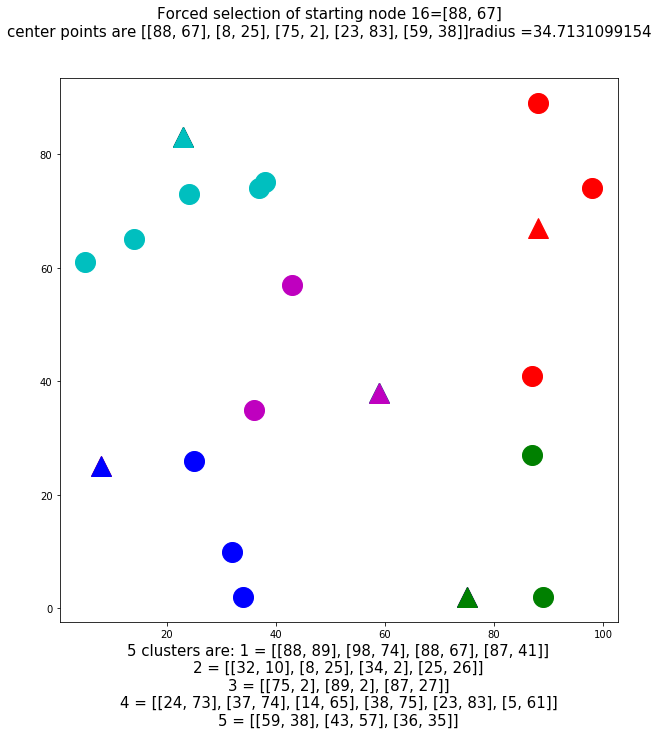

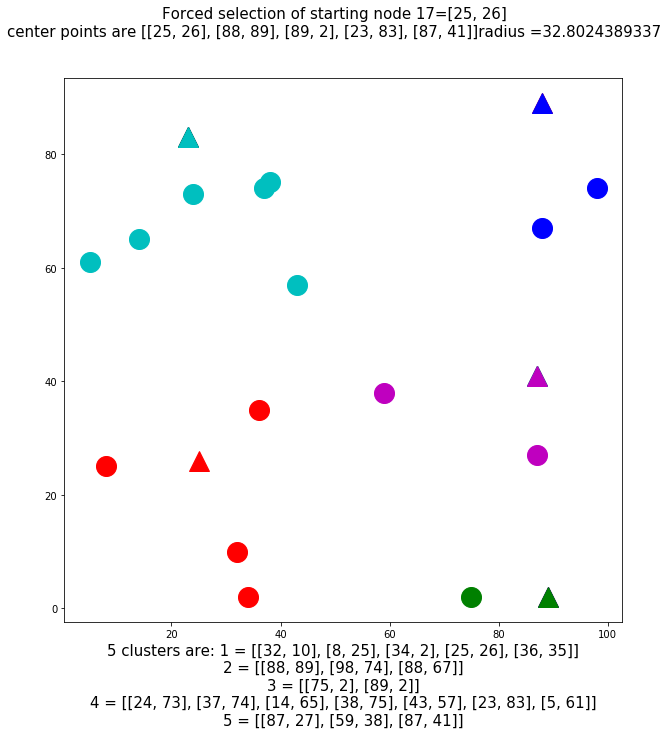

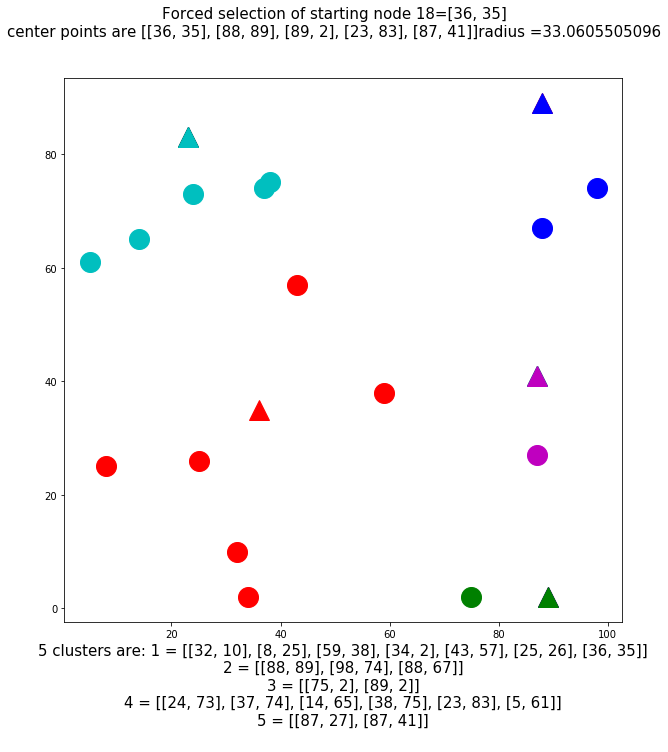

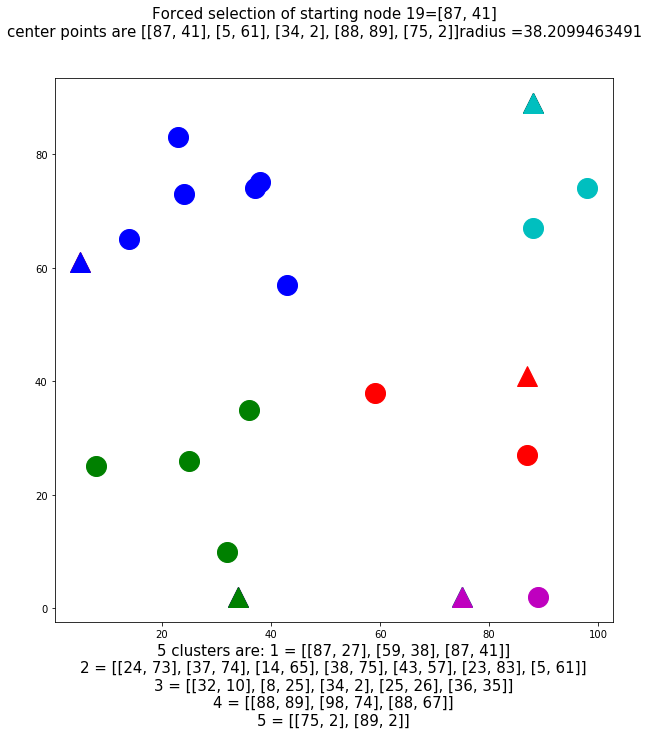

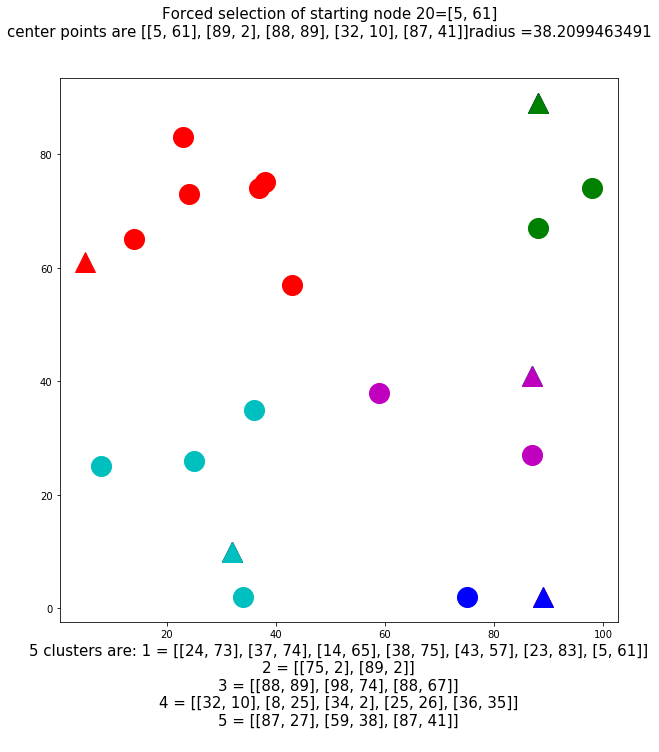

The best of all these forced selections is [24, 73] whose radius is 28.3019433962
The Greedy search algorithm selected node [5, 61] as starting node and its radius is 38.2099463491
So its proved that selection of best choice from all forced will always be better or equal. The radius will be less or equal to random 


In [1]:

"""
Created on Wed Nov 11 19:31:29 2017
@author: Faisal
"""

import random
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer



#This function finds the k centres
def find_centers(vertexes, k,j):
    s = [];
    s.append(vertexes[j])
    vertexes.pop(j)
    
    while len(s) < k:
        point=distance(vertexes, s)
        s.append(point )
        vertexes.remove (point)
    allpoints.append(s)
    

def distance(vertexes, picked):
    real_max = 0
    real_max_v = None
    minim= 0
    min_vert = None
    dist=[]
    for vert in vertexes:
        minim = np.inf
        for p in picked:
            dis = np.sqrt((float(vert[0]) - float(p[0]))**2+(float(vert[1]) - float(p[1]))**2)      
            if dis<minim:
                minim=dis
                min_vert=vert
        if minim > real_max:
            real_max = minim 
            real_max_v = min_vert
    dist.append(real_max)    
    return (real_max_v)   

    
#this function plots the data points
def plot_points(vertexes, marker):
    points = []
    for v in vertexes:  
        points.append((v[0],v[1]))
    xs = [x for [x, y] in points]
    ys = [y for [x, y] in points]
    
    plt.plot(xs, ys, marker,ms=20)
 
    #this function finds clusters and then ultimately the radius
    #and then plot all the graphs
def distancebetween_fianlpoints(allpoints):
    alldistances=[]
    allclusters=[]
    for ind,eachlist in enumerate(allpoints):
        centre_1_cluster= [[] for x in range(k)]
        distance1= [[] for x in range(k)]
        #finding distances of each each vertex to each center. and assiging it to the one having minimum distance
        for vert in range(len(vertexes1)):
            list_d=[]
            for i in range (k):
                d=np.sqrt((float(eachlist[i][0]) - float(vertexes1[vert][0]))**2+(float(eachlist[i][1]) - float(vertexes1[vert][1]))**2)
                list_d.append(d)
            minm=min(list_d)
            index=list_d.index(minm)
            #clustercentre_1_cluster contains set of clusters and distance1 contain distances
            for i in range(k):
                if(i==index):
                    centre_1_cluster[i].append (vertexes1[vert])
                    distance1[i].append(minm)
        #finding radius of each cluster and then finding the maximum one                
        maxd=[]
        for i in range(k):
            maxd.append(max(distance1[i]))
        maxdist=max(maxd)
        alldistances.append(maxdist)
        ############################################
        ######### Making Graph#####################
        ###########################################           
        print()
        #making title
        clust=""
        for i in range (k):
            clust=clust +str(i+1)+ " = "+ str(centre_1_cluster[i])+"\n"
        if (ind==0):
            ti="Randomly selected node =" +str(vertexes1[ind-1])+"\ncenter points are "+str(eachlist)+ "\nradius ="+str(maxdist)
        else:
            ti="Forced selection of starting node "+str(ind) +"=" +str(vertexes1[ind-1])+"\ncenter points are "+str(eachlist)+ "radius ="+str(maxdist)
        za=str(k)+" clusters are: "+clust
        #ploting the clusters
        col = ['r', 'b', 'g','c','m','y','k','w']
        plt.figure(figsize=(10,10))
        plt.suptitle(ti,fontsize=15)
        for i in range(k):
            plot_points(eachlist[i:], col[i%7]+"^")
            plot_points([item for item in centre_1_cluster[i] if item not in eachlist],col[i%7]+"o") 
        plt.xlabel(za,fontsize=15)
        name=str(ind)+'png'
        #saving and showing graphs
        plt.savefig(name)
        plt.show()
    #best result of naive  and comparison with greedy   
    best=min(alldistances)
    index_of_best=alldistances.index(best)
    print("The best of all these forced selections is %s whose radius is %s"%( vertexes1[index_of_best-1],best))
    print("The Greedy search algorithm selected node %s as starting node and its radius is %s"%(vertexes1[rannumb],alldistances[0]))
    print("So its proved that selection of best choice from all forced will always be better or equal. The radius will be less or equal to random ")
    
        

        
        
        
    
    
    
#vertexes1= [[40, 72], [100, 69], [81, 80], [46, 50], [14, 27], [87, 44], [69, 79], [18, 86], [99, 99], [22, 62],[80,20],[10,20],[30,17],[20,10],[60,40]]
vertexes1=[]
allpoints=[]

#taking node points
min1=0
max1=100
vertic=int(input("Enter number of n ="))
for i in range(0,vertic):
    x=random.randint(min1, max1)
    y=random.randint(min1,max1)
    vertexes1.append([x,y])
print('vertices = ',vertexes1)
ac=vertexes1[:]
#k is number of centers
k=int(input("Enter the value of k = "))
#applying greedy search (finding centers)
rannumb=random.randint(0,len(vertexes1))
find_centers(ac, k,rannumb)

#naive improvement search (finding centers)
for j in range(0,len(vertexes1)):
    ac=vertexes1[:]
    find_centers(ac, k,j)
#findng clusters and then plotting
distancebetween_fianlpoints(allpoints)

